In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [58]:
spotlight_df = pd.read_csv('./scores/scores_spotlight_oke1.csv')
fox_df = pd.read_csv('./scores/scores_fox_oke1.csv')
tagme_df = pd.read_csv('./scores/scores_tagme_oke1.csv')

all_none_df = pd.read_csv('./scores/scores_all_none_oke1.csv')
all_rsingle_df = pd.read_csv('./scores/scores_all_r_singles_oke1.csv')

In [59]:
spotlight2_df = pd.read_csv('./scores/scores_spotlight_oke2.csv')
fox2_df = pd.read_csv('./scores/scores_fox_oke2.csv')
tagme2_df = pd.read_csv('./scores/scores_tagme_oke2.csv')

all_none2_df = pd.read_csv('./scores/scores_all_none_oke2.csv')
all_rsingle2_df = pd.read_csv('./scores/scores_all_r_singles_oke2.csv')

In [60]:
def get_metrics(dfs):
    return pd.DataFrame([{
        'name': name, 
        'macro_precision': df.macro_precision.mean() , 
        'recall': df.recall.mean(),
        'f1': df.f1.mean()
    } for name, df in dfs])

In [61]:

metrics1 = get_metrics([
    ('spotlight', spotlight_df),
    ('fox', fox_df),
    ('tagme', tagme_df),
    ('all_none', all_none_df),
    ('all_rsingle', all_rsingle_df)
])

metrics2 = get_metrics([
    ('spotlight', spotlight2_df),
    ('fox', fox2_df),
    ('tagme', tagme2_df),
    ('all_none', all_none2_df),
    ('all_rsingle', all_rsingle2_df)
])

metrics1['source'] = 'task_1'
metrics2['source'] = 'task_2'

metrics_all = metrics1.append(metrics2).reset_index()[['source', 'name', 'macro_precision', 'recall', 'f1']]
metrics_all

,source,name,macro_precision,recall,f1
0,task_1,spotlight,0.375183,0.559700,0.436195
1,task_1,fox,0.535532,0.722321,0.577936
2,task_1,tagme,0.497108,0.423898,0.425966
3,task_1,all_none,0.352618,0.822606,0.472471
4,task_1,all_rsingle,0.550383,0.606975,0.557696
5,task_2,spotlight,0.410923,0.472459,0.417669
6,task_2,fox,0.513205,0.529287,0.481071
7,task_2,tagme,0.545058,0.340656,0.396147
8,task_2,all_none,0.390983,0.707172,0.471816
9,task_2,all_rsingle,0.550548,0.466225,0.478729


## Precisão

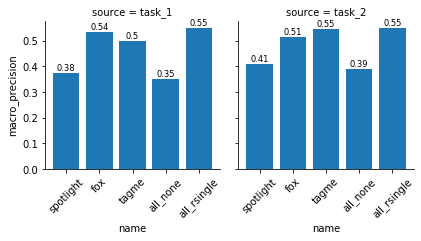

In [62]:
g = sns.FacetGrid(metrics_all, col="source")
g.map(plt.bar, "name", "macro_precision");
g.set_xticklabels(rotation=45)

for t_, task in enumerate(metrics_all.source.unique()):
    for i, v in enumerate(metrics_all[metrics_all.source == task].macro_precision):
        g.axes[0, t_].text(i, v + 0.01, str(round(v, 2)), color='black', horizontalalignment='center', size='small')

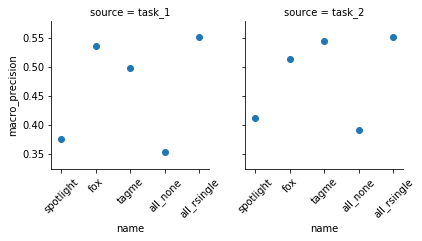

In [63]:
g = sns.FacetGrid(metrics_all, col="source")
g.map(plt.scatter, "name", "macro_precision");
g.set_xticklabels(rotation=45)

## Recall

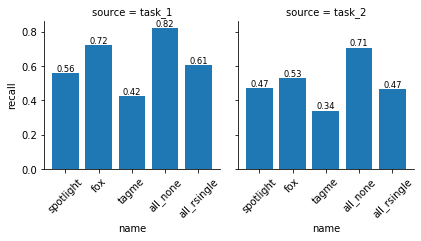

In [64]:
g = sns.FacetGrid(metrics_all, col="source")
g.map(plt.bar, "name", "recall");
g.set_xticklabels(rotation=45)

for t_, task in enumerate(metrics_all.source.unique()):
    for i, v in enumerate(metrics_all[metrics_all.source == task].recall):
        g.axes[0, t_].text(i, v + 0.01, str(round(v, 2)), color='black', horizontalalignment='center', size='small')

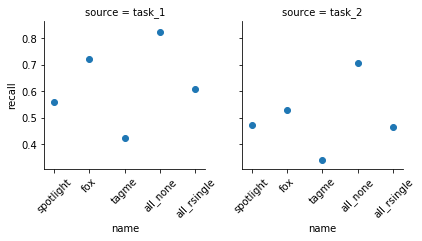

In [65]:
g = sns.FacetGrid(metrics_all, col="source")
g.map(plt.scatter, "name", "recall");
g.set_xticklabels(rotation=45)

## F1

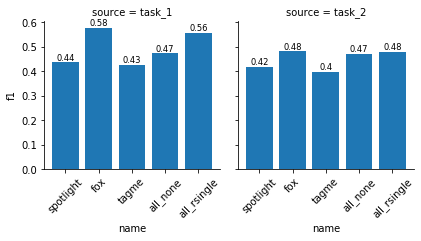

In [66]:
g = sns.FacetGrid(metrics_all, col="source")
g.map(plt.bar, "name", "f1");
g.set_xticklabels(rotation=45)

for t_, task in enumerate(metrics_all.source.unique()):
    for i, v in enumerate(metrics_all[metrics_all.source == task].f1):
        g.axes[0, t_].text(i, v + 0.01, str(round(v, 2)), color='black', horizontalalignment='center', size='small')

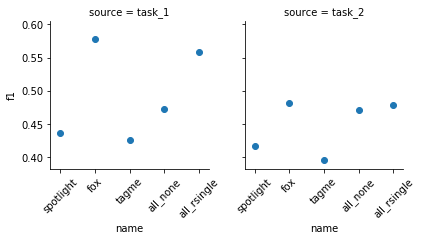

In [67]:
g = sns.FacetGrid(metrics_all, col="source")
g.map(plt.scatter, "name", "f1");
g.set_xticklabels(rotation=45)

## Precisão X Recall

### Todos

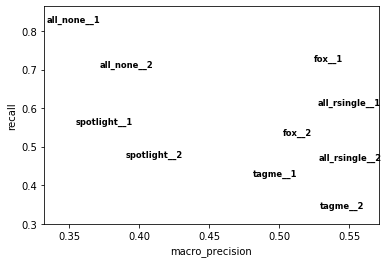

In [68]:
ax = sns.scatterplot(x="macro_precision", y="recall", data=metrics_all, color='white')
for line in range(0, metrics_all.shape[0]):
     ax.text(metrics_all.macro_precision[line], metrics_all.recall[line], metrics_all.name[line] + '_' + metrics_all.source[line][-2:], horizontalalignment='center', size='small', color='black', weight='semibold')

### Task 1

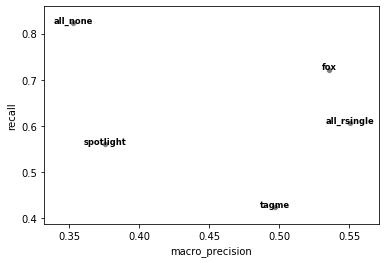

In [69]:
ax = sns.scatterplot(x="macro_precision", y="recall", data=metrics1, color='gray')
for line in range(0, metrics1.shape[0]):
     ax.text(metrics1.macro_precision[line], metrics1.recall[line], metrics1.name[line], horizontalalignment='center', size='small', color='black', weight='semibold')

### Task 2

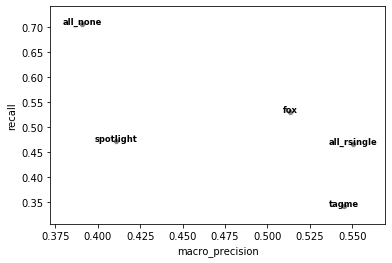

In [70]:
ax = sns.scatterplot(x="macro_precision", y="recall", data=metrics2, color='gray')
for line in range(0, metrics2.shape[0]):
     ax.text(metrics2.macro_precision[line], metrics2.recall[line], metrics2.name[line], horizontalalignment='center', size='small', color='black', weight='semibold')